# Hdf5 Generator

- This project will help you to generate hdf5 file.
- This codes can change all images you input to "one" hdf5 file
- The image size of inside of the file will be fixed 64x64 (you can manipulate the size)
- This code will display how to generate training set, test set of images for your model
- You can load the images(converted size) from the hdf5 file (see hdf5_load.ipynb)
- Image file names must be "name_class".format (e.g cat_0.jpg)

In [1]:
from PIL import Image
from resizeimage import resizeimage 
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import h5py 

In [2]:
# get files in user_img_data 
def getfilelist(url):
    image_urls = []
    for (path, dir, files) in os.walk(url):
        for filename in files:
            ext = os.path.splitext(filename)[-1]
            if ext == '.png' or ext == '.jpg' or ext == '.jpeg' or ext == '.gif' or ext == '.bmp' or ext == '.PNG' or ext == '.JPG' or ext == '.JPEG' or ext == '.GIF' or ext == '.BMP':
                image_urls.append(path+"/"+filename)
    return image_urls

5


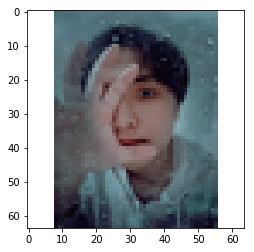

In [3]:
# training data:
# change image sizes (you can set other numbers if you want)
row_standard = 64
col_standard = 64

# get images from the folder "./data"
image_urls = getfilelist("./data")

# All pixel information of images
# should be unit8 (or color data will not be stored)
many_images = np.empty((len(image_urls), row_standard, col_standard, 3), dtype=np.uint8)
many_classes = np.empty((len(image_urls)))

# the number of images
print(len(image_urls))

for i in range(len(image_urls)):
    im = Image.open(image_urls[i])
    im = resizeimage.resize_contain(im, [row_standard, col_standard])
    oneImage = np.array(im)

    many_images[i] = oneImage[:,:,0:3]  # Last 4th channel, RGB"A" will not be considered
                                        # dtype: unit8
    plt.imshow(many_images[i])    # display image
    
    # Goldstandard(class): for example) human image: 1, else: 0
    fileclass = image_urls[i].split("_")[-1].split(".")[0]
    many_classes[i] = fileclass

In [4]:
# save (training) images
f = h5py.File("data.hdf5", "w")
dset = f.create_dataset("train_x", data = many_images)
dset = f.create_dataset("train_y", data = many_classes)
f.close()

In [5]:
f = h5py.File("data.hdf5", "r")
test_x = np.array(f["train_x"][:])
test_y = np.array(f["train_y"][:])
f.close

<bound method File.close of <HDF5 file "data.hdf5" (mode r)>>